In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Capstone')


In [3]:
df

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,YuNUs eMRE,Not Given,Turkey,1/17/2017,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,zAK sTorm,Not Given,United States,9/13/2018,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,ziNdAGi gULZAR haI,Not Given,Pakistan,12/15/2016,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,yOKO,Not Given,Pakistan,6/23/2018,TV-Y,1 Season,Kids' TV


## Data Assessment and cleaning

In [4]:
#checking for the columns
df.describe().columns

Index(['show_id', 'Type', 'title', 'director', 'Country', 'date added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8790 non-null   object
 1   Type        8790 non-null   object
 2   title       8790 non-null   object
 3   director    8790 non-null   object
 4   Country     8790 non-null   object
 5   date added  8790 non-null   object
 6   rating      8790 non-null   object
 7   duration    8790 non-null   object
 8   listed_in   8790 non-null   object
dtypes: object(9)
memory usage: 618.2+ KB


In [6]:
#changing the spacing in between the column titles to underscore and changing it to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
#checking if the change works
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
#doing the data cleaning by correct the objects in the column'type' to the correct spelling
replace_dict ={'Mvie': 'Movie', 
              'Mve': 'Movie',
              'Mv': 'Movie',
              'm': 'Movie',
              'Mvi': 'Movie',
              'M': 'Movie',
              'MvE': 'Movie',
              'TVS': 'TV Show',
              'TV': 'TV Show',
              'tv': 'TV Show',}
df['type'] = df['type'].replace(replace_dict)
type_counts = df['type'].value_counts()
print(type_counts)


Movie      6126
TV Show    2664
Name: type, dtype: int64


In [9]:
# to check if function run
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [9]:
pd.set_option('display.max_rows', 50)

In [10]:
#to assess the the country column
df['country'].value_counts()

United States     2920
India             1047
United Kingdom     604
Pakistan           419
Not Given          287
                  ... 
Greece               1
Soviet Union         1
ITL                  1
PK                   1
Paraguay             1
Name: country, Length: 114, dtype: int64

In [11]:
#doing the data cleaning by correct the objects in the column'country' to the correct spelling
replace_dict = {'United State': 'United States', 'United states':'United States','united states': 'United States', 'us': 'United States', 'US': 'United States', 'nited States': 'United States', 'united States': 'United States', 'Us': 'United States',
              'UK': 'United Kingdom','uk': 'United Kingdom',
                'PK': 'Pakistan', 'pakistan': 'Pakistan',
                'JP':'Japan', 'japan': 'Japan',
                'mexico': 'Mexico',
                'ID': 'Indonesia',
               'australia': 'Australia',
               'thailan': 'Thailand', 'thailand': 'Thailand',
               'canada': 'Canada',
                'UAE': 'United Arab Emirates',
                'Argentin': 'Argentina',
                'taiwan': 'Taiwan',
                'ITL': 'Italy',
                'malaysia': 'Malaysia',
                'india': 'India',
                'china': 'China'
               }
df['country'] = df['country'].replace(replace_dict)
type_counts = df['country'].value_counts()
print(type_counts)



United States     3240
India             1048
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 87, dtype: int64


In [31]:
#changing the dataframe to title case
df.title = df.title.str.title()


In [103]:
df.head(50)

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month,year,day,year_month,genre_1,genre_2,genre_3,genre_mix,days_since_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,9,2021,25,2021-09,Documentaries,,,",,Documentaries",879
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,2021-09,Crime TV Shows,International TV Shows,TV Action & Adventure,"International TV Shows, TV Action & Adventure...",880
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,2021-09,TV Dramas,TV Horror,TV Mysteries,"TV Horror, TV Mysteries,TV Dramas",880
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,2021-09,Children & Family Movies,Comedies,,", Comedies,Children & Family Movies",882
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,2021-09,Dramas,Independent Movies,International Movies,"Independent Movies, International Movies,Dramas",880
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,TV-14,9 Seasons,"British TV Shows, Reality TV",9,2021,24,2021-09,British TV Shows,Reality TV,,", Reality TV,British TV Shows",880
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,PG-13,104 min,"Comedies, Dramas",9,2021,24,2021-09,Comedies,Dramas,,", Dramas,Comedies",880
7,s939,Movie,Motu Patlu In The Game Of Zones,Suhas Kadav,India,2021-05-01,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",5,2021,1,2021-05,Children & Family Movies,Comedies,Music & Musicals,"Comedies, Music & Musicals,Children & Family ...",1026
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,TV-MA,127 min,"Dramas, International Movies",9,2021,23,2021-09,Dramas,International Movies,,", International Movies,Dramas",881
9,s940,Movie,Motu Patlu In Wonderland,Suhas Kadav,India,2021-05-01,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",5,2021,1,2021-05,Children & Family Movies,Music & Musicals,,", Music & Musicals,Children & Family Movies",1026


In [13]:
# removing the brackets in the 'date_added'column
df['date_added'] = df['date_added'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

In [14]:
df.date_added

0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
8785     1/17/2017
8786     9/13/2018
8787    12/15/2016
8788     6/23/2018
8789    06/07/2018
Name: date_added, Length: 8790, dtype: object

In [15]:
#changing the 'date_added'column date type to 'datetime'
df.date_added = df.date_added.astype('datetime64[ns]')

Seperating the month, day and year into in different column

In [33]:
df.date_added.dt.month
df['month'] = df['date_added'].dt.month

In [34]:
df.date_added.dt.year
df['year'] = df['date_added'].dt.year

In [35]:
df.date_added.dt.day
df['day'] = df['date_added'].dt.day

In [36]:
df['year_month'] = df['date_added'].dt.strftime('%Y-%m')


### Calculating the difference between today's date and 'date_added'

In [104]:
# Calculating the difference between today's date and 'date_added'
from datetime import datetime
today = datetime.today()
df['days_since_added'] = (today - df['date_added']).dt.days


In [106]:
df.days_since_added

0        879
1        880
2        880
3        882
4        880
        ... 
8785    2591
8786    1987
8787    2624
8788    2069
8789    2085
Name: days_since_added, Length: 8790, dtype: int64

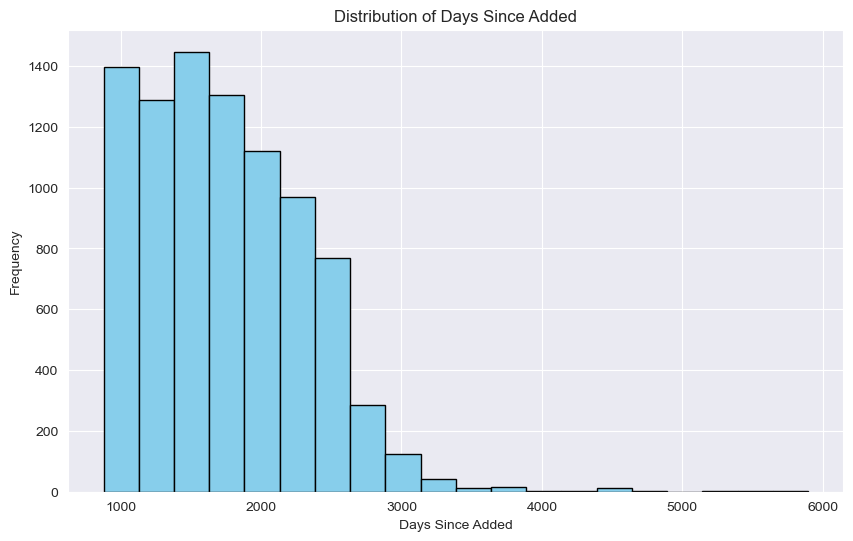

In [105]:
# visualizing the difference between today's date and 'date_added'
plt.figure(figsize=(10, 6))
plt.hist(df['days_since_added'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Since Added')
plt.xlabel('Days Since Added')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

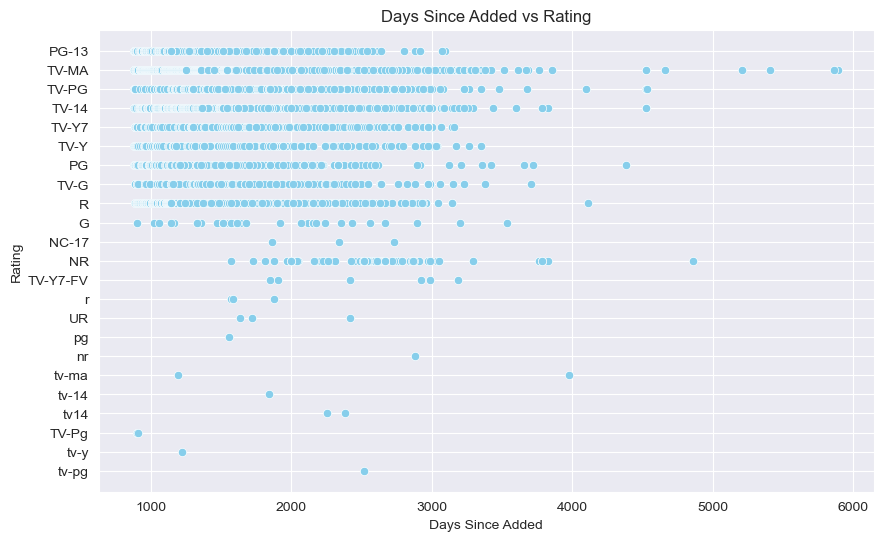

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_since_added', y='rating', data=df, color='skyblue')
plt.title('Days Since Added vs Rating')
plt.xlabel('Days Since Added')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [20]:
from collections import Counter

In [21]:
# to know the most popular director using the counter method
director = df['director']

# I flatten the column first
director = director.explode()
director_counts = Counter(director)
most_popular_director, count = director_counts.most_common(1)[0]
print("The most popular director is:", most_popular_director)
print("Number of occurrences:", count)

The most popular director is: Not Given
Number of occurrences: 2588


In [22]:
#checking for the most popular director  but spreading out the column first
counter = df.director.value_counts()
print (counter)

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64


In [23]:
# to check for the top 5 most popular director

director_counts = df['director'].value_counts()

top_directors = director_counts.head()
print("Top 5 most popular directors:")
print(top_directors)

Top 5 most popular directors:
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: director, dtype: int64


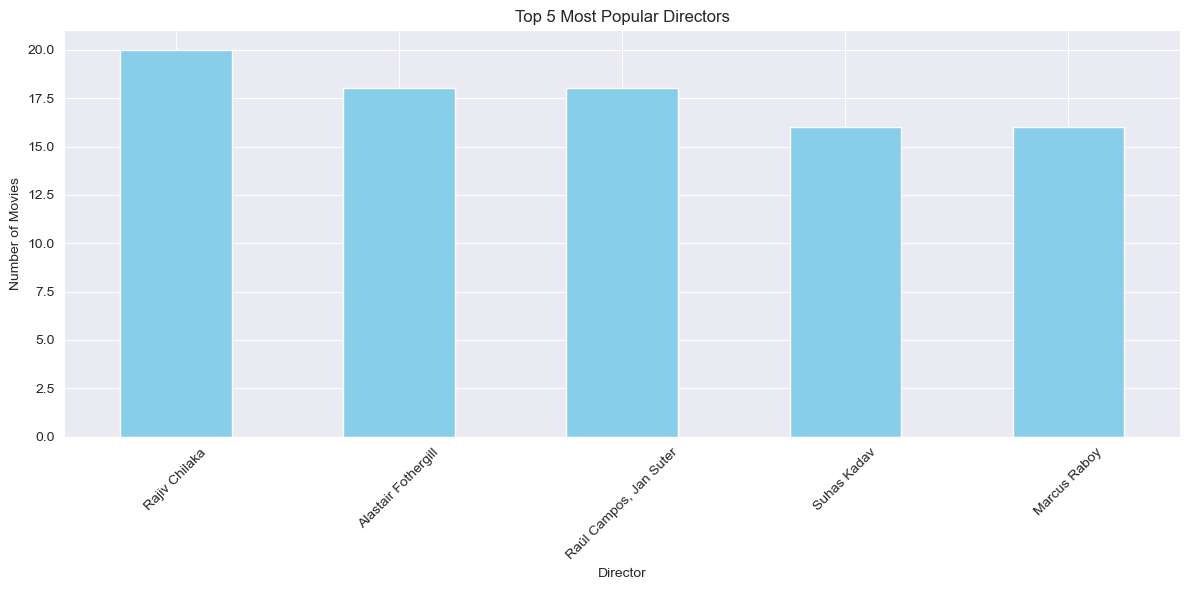

In [114]:
director_counts = df['director'].value_counts()
if 'Not Given' in director_counts:
    director_counts = director_counts.drop('Not Given')

top_directors = director_counts.head()

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Popular Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# to check for the top 5 countries that makes the most movies 
country_movie_counts = df['country'].value_counts()

top_countries = country_movie_counts.head(5)
print("countries that makes the most movies:")
print(top_countries)


countries that makes the most movies:
United States     3240
India             1048
United Kingdom     638
Pakistan           421
Not Given          287
Name: country, dtype: int64


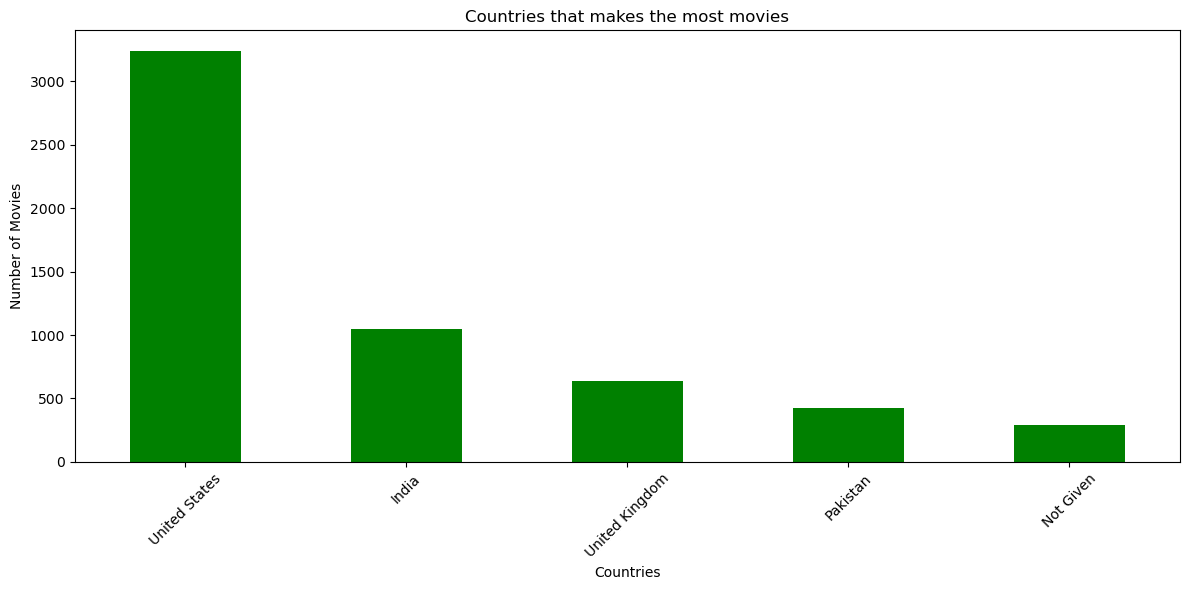

In [26]:
# to visualize for the top 5 countries that makes the most movies 
country_movie_counts = df['country'].value_counts()

top_countries = country_movie_counts.head(5)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='Green')
plt.title('Countries that makes the most movies')
plt.xlabel('Countries')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
sns.set_style('darkgrid')

### checking for the least 5 countries that makes the most movies

In [28]:
# to check for the least 5 countries that makes the most movies 
country_movie_counts = df['country'].value_counts()

least_countries = country_movie_counts.tail(5)
print("countries that makes the least movies:")
print(least_countries)

countries that makes the least movies:
Iran            1
West Germany    1
Greece          1
Zimbabwe        1
Soviet Union    1
Name: country, dtype: int64


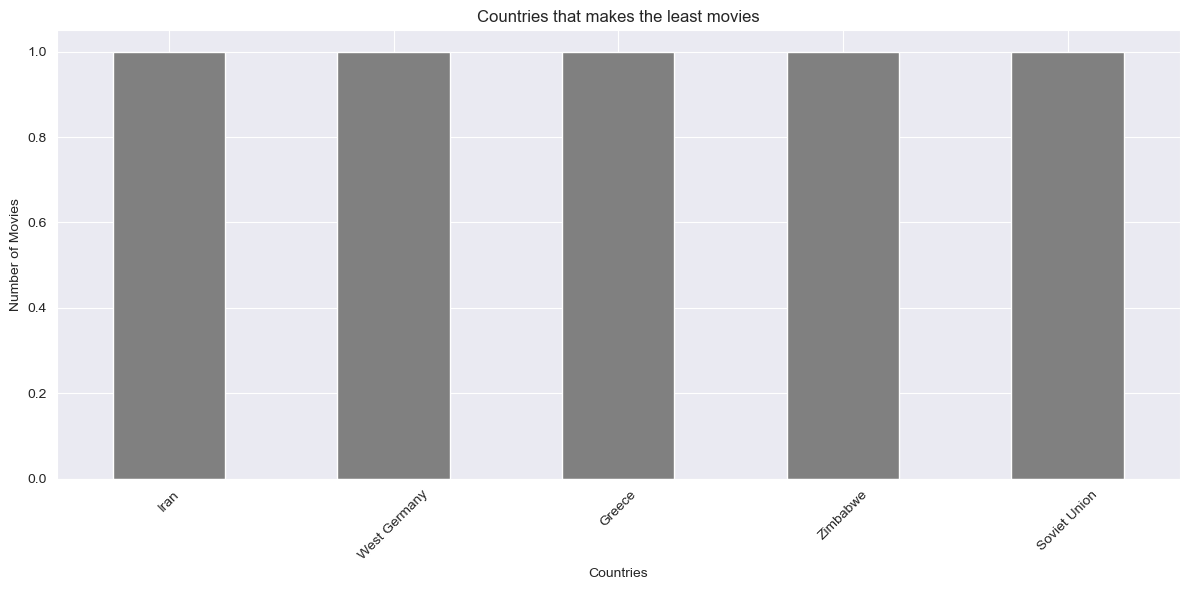

In [29]:
# to visualize for the top 5 countries that makes the most movies 
country_movie_counts = df['country'].value_counts()

least_countries = country_movie_counts.tail(5)

plt.figure(figsize=(12, 6))
least_countries.plot(kind='bar', color='Grey')
plt.title('Countries that makes the least movies')
plt.xlabel('Countries')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
pd.set_option('display.max_rows', None)

### Separating movies and TV shows into different dataframes

In [37]:
# Separating movies and TV shows into different dataframes
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Display the separated dataframes
print("Movies:")
print(movies_df)

print("\nTV Shows:")
print(tv_shows_df)

Movies:
     show_id   type                             title         director  \
0         s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
3        s14  Movie  Confessions Of An Invisible Girl    Bruno Garotti   
4         s8  Movie                           Sankofa     Haile Gerima   
6        s10  Movie                      The Starling   Theodore Melfi   
7       s939  Movie   Motu Patlu In The Game Of Zones      Suhas Kadav   
...      ...    ...                               ...              ...   
8702   s8232  Movie                          The Bund        Not Given   
8707   s8269  Movie                  The Darkest Dawn        Not Given   
8716   s8331  Movie                  The Great Battle        Not Given   
8763   s8648  Movie       Twisted Trunk, Big Fat Body        Not Given   
8783   s8785  Movie              Yoko And His Friends        Not Given   

             country date_added rating duration  \
0      United States 2021-09-25  PG-13   90 min   
3

In [38]:
df.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month,year,day,year_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,9,2021,25,2021-09
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,2021-09
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,2021-09
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,2021-09
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,2021-09


In [140]:
# Spliting the 'listed_in' column and assign the result to new columns
split_columns = df['listed_in'].str.split(',', expand=True)
    # Rename the new columns based on the split values
split_columns.rename(columns={
    0: 'genre_1',
    1: 'genre_2',
    2: 'genre_3'  
}, inplace=True)

# then i concatenate the split columns with the original dataframe
df = pd.concat([df, split_columns], axis=1)


TypeError: 'NoneType' object is not subscriptable

In [40]:
df.fillna('', inplace=True)


### To get the most popular genre mix

In [41]:

#  i concatenate genre columns to form a new column containing combined genres
df['genre_mix'] = df.apply(lambda x: ','.join(sorted([x['genre_1'], x['genre_2'], x['genre_3']])), axis=1)


In [42]:
genre_mix_counts = df['genre_mix'].value_counts()

In [43]:
genre_mix_counts

, International Movies,Dramas                       362
,,Documentaries                                     358
,,Stand-Up Comedy                                   334
 Dramas, International Movies,Comedies              274
 Independent Movies, International Movies,Dramas    252
                                                   ... 
 Reality TV, Teen TV Shows,Docuseries                 1
 Independent Movies, Thrillers,Classic Movies         1
, Faith & Spirituality,Children & Family Movies       1
 Comedies, Sports Movies,Classic Movies               1
 Crime TV Shows, TV Dramas,Classic & Cult TV          1
Name: genre_mix, Length: 515, dtype: int64

In [93]:
most_popular_genre_mix = genre_mix_counts.idxmax()
count_of_most_popular = genre_mix_counts.max()

print("Most popular genre mix:", most_popular_genre_mix)
print("Count:", count_of_most_popular)

Most popular genre mix: , International Movies,Dramas
Count: 362


In [96]:
genre_1_counts = df['genre_1'].value_counts()
most_popular_genre_1 = genre_1_counts.idxmax()
count_of_most_popular_genre_1 = genre_1_counts.max()
print("Most popular genre_1:", most_popular_genre_1)
print("Count:", count_of_most_popular_genre_1)

Most popular genre_1: Dramas
Count: 1599


In [98]:
genre_2_counts = df['genre_2'].value_counts()
most_popular_genre_2 = genre_2_counts.idxmax()
count_of_most_popular_genre_2 = genre_2_counts.max()
print("Most popular genre_2:", most_popular_genre_2)
print("Count:", count_of_most_popular_genre_2)

Most popular genre_2: 
Count: 2013


In [101]:
most_popular_genre_2
#how i get rid of the spacing

''

In [99]:
genre_3_counts = df['genre_3'].value_counts()
most_popular_genre_3 = genre_3_counts.idxmax()
count_of_most_popular_genre_3 = genre_3_counts.max()
print("Most popular genre_3:", most_popular_genre_3)
print("Count:", count_of_most_popular_genre_3)

Most popular genre_3: 
Count: 5064


In [45]:
df

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month,year,day,year_month,genre_1,genre_2,genre_3,genre_mix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,9,2021,25,2021-09,Documentaries,,,",,Documentaries"
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,2021-09,Crime TV Shows,International TV Shows,TV Action & Adventure,"International TV Shows, TV Action & Adventure..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,2021-09,TV Dramas,TV Horror,TV Mysteries,"TV Horror, TV Mysteries,TV Dramas"
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,2021-09,Children & Family Movies,Comedies,,", Comedies,Children & Family Movies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,2021-09,Dramas,Independent Movies,International Movies,"Independent Movies, International Movies,Dramas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,TV-PG,2 Seasons,"International TV Shows, TV Dramas",1,2017,17,2017-01,International TV Shows,TV Dramas,,", TV Dramas,International TV Shows"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,TV-Y7,3 Seasons,Kids' TV,9,2018,13,2018-09,Kids' TV,,,",,Kids' TV"
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",12,2016,15,2016-12,International TV Shows,Romantic TV Shows,TV Dramas,"Romantic TV Shows, TV Dramas,International TV..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,TV-Y,1 Season,Kids' TV,6,2018,23,2018-06,Kids' TV,,,",,Kids' TV"


### To get the movie trend over the years.

In [55]:
#Filtering dataframe to include only movies
movies_df = df[df['type'] == 'Movie']

In [56]:
# Then grouping by year and we count the number of movies
movie_trend = movies_df.groupby('year').size()

In [57]:
movie_trend

year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
dtype: int64

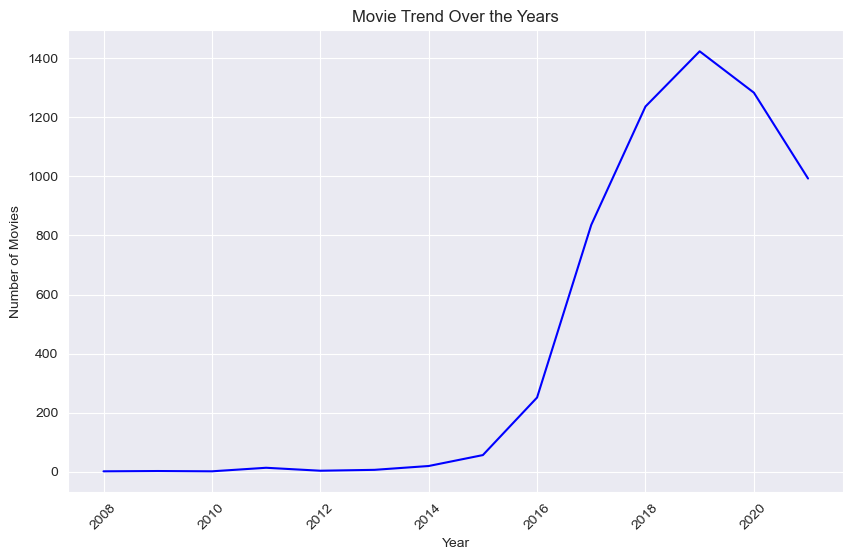

In [59]:
plt.figure(figsize=(10, 6))
movie_trend.plot(kind='line', color='b')
plt.title('Movie Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)    
plt.show()

In [45]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `style` for t

### To find the countries with the highest average movie duration

In [60]:
#Filtering out rows with durations in minutes only
df_movies = df[df['duration'].str.contains('min')]

In [61]:
df_movies

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month,year,day,year_month,genre_1,genre_2,genre_3,genre_mix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,9,2021,25,2021-09,Documentaries,,,",,Documentaries"
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,2021-09,Children & Family Movies,Comedies,,", Comedies,Children & Family Movies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,2021-09,Dramas,Independent Movies,International Movies,"Independent Movies, International Movies,Dramas"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,PG-13,104 min,"Comedies, Dramas",9,2021,24,2021-09,Comedies,Dramas,,", Dramas,Comedies"
7,s939,Movie,Motu Patlu In The Game Of Zones,Suhas Kadav,India,2021-05-01,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",5,2021,1,2021-05,Children & Family Movies,Comedies,Music & Musicals,"Comedies, Music & Musicals,Children & Family ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,Not Given,Hong Kong,2018-09-20,TV-14,103 min,"Action & Adventure, Dramas, International Movies",9,2018,20,2018-09,Action & Adventure,Dramas,International Movies,"Dramas, International Movies,Action & Adventure"
8707,s8269,Movie,The Darkest Dawn,Not Given,United Kingdom,2018-06-23,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern...",6,2018,23,2018-06,Action & Adventure,Independent Movies,International Movies,"Independent Movies, International Movies,Acti..."
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,TV-MA,136 min,"Action & Adventure, Dramas, International Movies",4,2019,8,2019-04,Action & Adventure,Dramas,International Movies,"Dramas, International Movies,Action & Adventure"
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,TV-14,89 min,"Dramas, International Movies",1,2017,15,2017-01,Dramas,International Movies,,", International Movies,Dramas"


In [62]:
df_movies = df_movies.copy()

In [63]:
df_movies['duration'] = df_movies['duration'].astype(str)
# Then extracting the duration in minutes as a numerical value
df_movies['duration'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)

In [64]:
# Extracting country information (assuming country information is in a column named 'country')
countries = df_movies['country'].str.split(',').explode().str.strip()

In [65]:
average_duration_by_country = df_movies.groupby('country')['duration'].mean()


In [66]:
# Finding the country with the highest average movie duration
country_highest_avg_duration = average_duration_by_country.idxmax()
highest_avg_duration = average_duration_by_country.max()

print(f"The country with the highest average movie duration is {country_highest_avg_duration} with an average duration of {highest_avg_duration} minutes.")

The country with the highest average movie duration is Croatia with an average duration of 157.0 minutes.


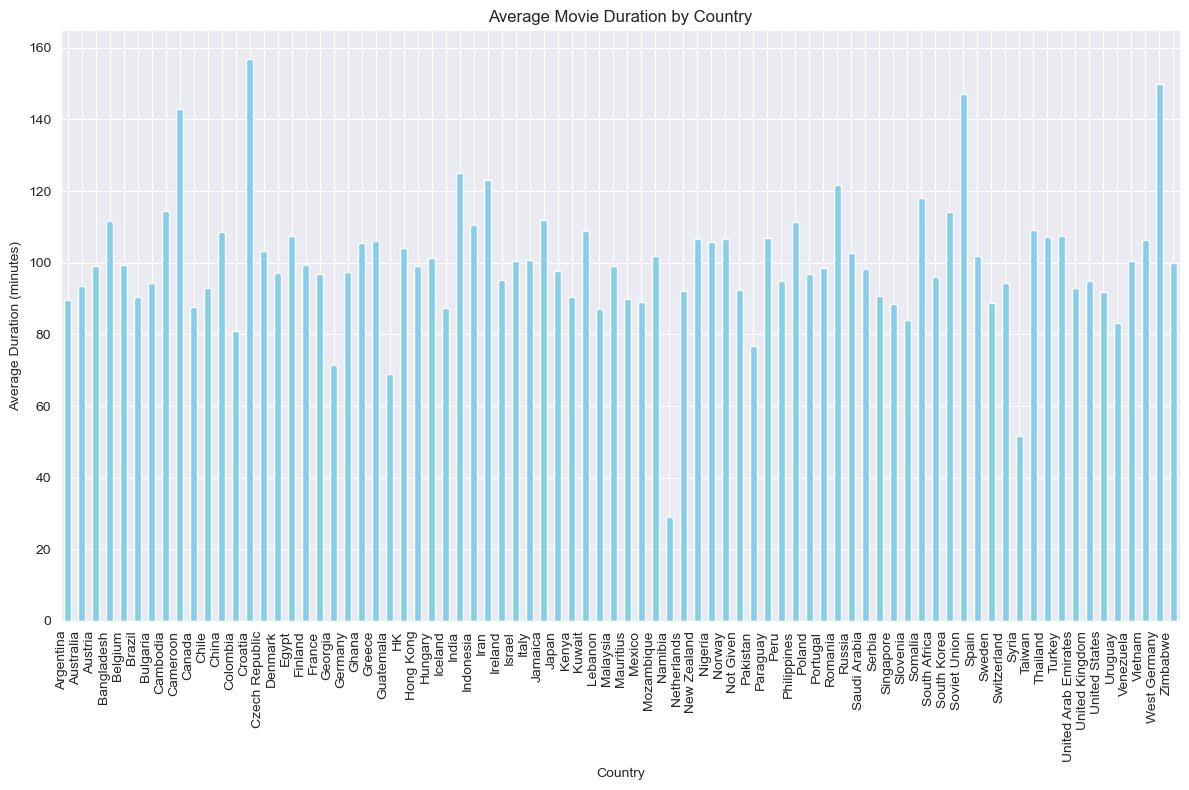

In [67]:
# Plotting the average duration for each country
plt.figure(figsize=(12, 8))
average_duration_by_country.plot(kind='bar', color='skyblue')
plt.title('Average Movie Duration by Country')
plt.xlabel('Country')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()

In [120]:
df_with_dummies = pd.get_dummies(df, columns=['type'], prefix='', prefix_sep='')

# Renaming the columns for clarity
df_with_dummies.rename(columns={'Movie': 'is_movie', 'TV Show': 'is_tv_show'}, inplace=True)
type_dummies = pd.get_dummies(df['type'])

# Joining the original DataFrame with the dummy columns
df = pd.concat([df, type_dummies], axis=1)



In [121]:
df.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month,year,day,year_month,genre_1,genre_2,genre_3,genre_mix,days_since_added,Movie,TV Show
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,9,2021,25,2021-09,Documentaries,,,",,Documentaries",879,1,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,2021-09,Crime TV Shows,International TV Shows,TV Action & Adventure,"International TV Shows, TV Action & Adventure...",880,0,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,2021-09,TV Dramas,TV Horror,TV Mysteries,"TV Horror, TV Mysteries,TV Dramas",880,0,1
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,2021-09,Children & Family Movies,Comedies,,", Comedies,Children & Family Movies",882,1,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,2021-09,Dramas,Independent Movies,International Movies,"Independent Movies, International Movies,Dramas",880,1,0


all the tv_show duration and now showing 'None' in the copied dataframe

### To generated random ratings for each movie

def generate_random_ratings(df):
    df['rating'] = np.random.uniform(1, 10, size=len(df)).round(2)

In [80]:
df_movies_another_copy = df_movies.copy()

In [81]:
#Filtering dataframe to include only movies
df_movies_another_copy = df[df['type'] == 'Movie']

In [85]:
df_movies_another_copy = df_movies_another_copy.copy()
# Generate random ratings for each movie in the new copy
df_movies_another_copy.loc[:, 'rating'] = np.random.uniform(low=1.0, high=10.0, size=len(df_movies_another_copy))

C:\Users\USER\AppData\Local\Temp\ipykernel_6008\144416696.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_movies_another_copy.loc[:, 'rating'] = np.random.uniform(low=1.0, high=10.0, size=len(df_movies_another_copy))


In [108]:
print(df_movies_another_copy [['type', 'rating']])

       type    rating
0     Movie  2.879229
3     Movie  2.097570
4     Movie  1.692883
6     Movie  6.698470
7     Movie  6.418623
...     ...       ...
8702  Movie  5.903925
8707  Movie  2.282138
8716  Movie  8.054388
8763  Movie  5.488339
8783  Movie  2.041508

[6126 rows x 2 columns]


In [112]:
df.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month,year,day,year_month,genre_1,genre_2,genre_3,genre_mix,days_since_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,9,2021,25,2021-09,Documentaries,,,",,Documentaries",879
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,2021-09,Crime TV Shows,International TV Shows,TV Action & Adventure,"International TV Shows, TV Action & Adventure...",880
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,2021-09,TV Dramas,TV Horror,TV Mysteries,"TV Horror, TV Mysteries,TV Dramas",880
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,2021-09,Children & Family Movies,Comedies,,", Comedies,Children & Family Movies",882
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,2021-09,Dramas,Independent Movies,International Movies,"Independent Movies, International Movies,Dramas",880


In [109]:
ratings_counts

1.001001    1
1.001297    1
1.001603    1
1.001787    1
1.002059    1
           ..
9.995129    1
9.995882    1
9.998396    1
9.998763    1
9.999849    1
Name: rating, Length: 6126, dtype: int64

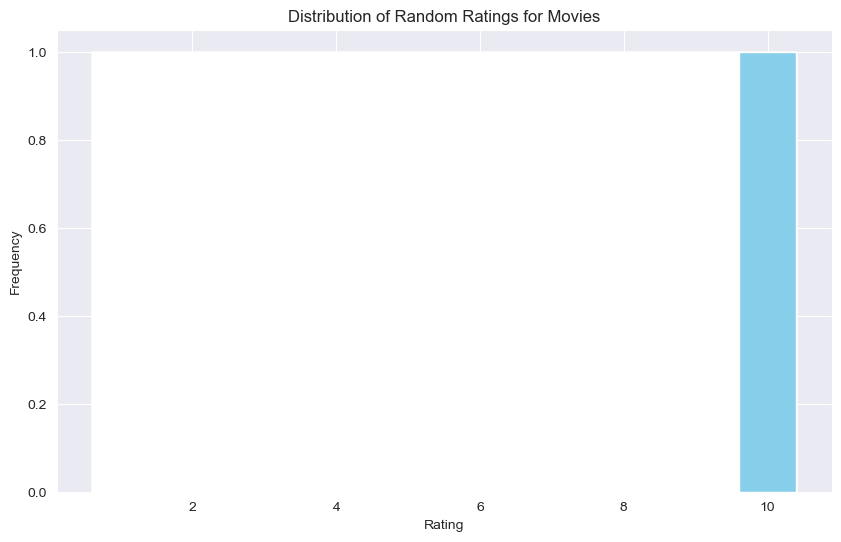

In [110]:
# Plotting the bar plot of random ratings
plt.figure(figsize=(10, 6))
ratings_counts = df_movies_another_copy['rating'].value_counts().sort_index()
plt.bar(ratings_counts.index, ratings_counts.values, color='skyblue')
plt.title('Distribution of Random Ratings for Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

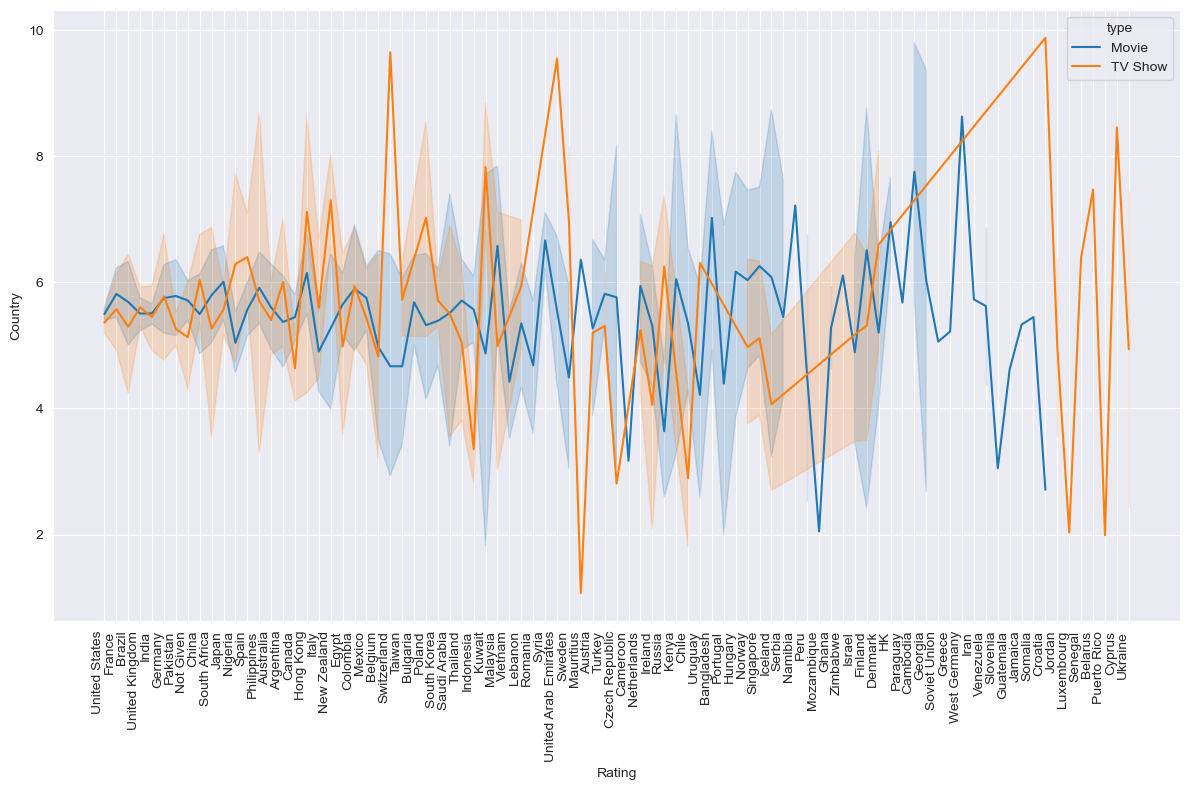

In [164]:
# distribution of movie rating annd the country
plt.figure(figsize=(12, 8))
sns.lineplot(x =df.country, y = df.rating, hue = df.type)
plt.xlabel('Rating')
plt.ylabel('Country')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 30)
sns.scatterplot(x =df.country, y = df.director, hue = df.type)
plt.xticks(rotation=90, ha='right')  
plt.show()

In [163]:
df

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month,year,day,year_month,genre_1,genre_2,genre_3,genre_mix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,4.77,90 min,Documentaries,9,2021,25,2021-09,Documentaries,,,",,Documentaries"
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,5.52,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,2021-09,Crime TV Shows,International TV Shows,TV Action & Adventure,"International TV Shows, TV Action & Adventure..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,4.76,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,2021-09,TV Dramas,TV Horror,TV Mysteries,"TV Horror, TV Mysteries,TV Dramas"
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,4.69,91 min,"Children & Family Movies, Comedies",9,2021,22,2021-09,Children & Family Movies,Comedies,,", Comedies,Children & Family Movies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,5.14,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,2021-09,Dramas,Independent Movies,International Movies,"Independent Movies, International Movies,Dramas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,3.70,2 Seasons,"International TV Shows, TV Dramas",1,2017,17,2017-01,International TV Shows,TV Dramas,,", TV Dramas,International TV Shows"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,5.99,3 Seasons,Kids' TV,9,2018,13,2018-09,Kids' TV,,,",,Kids' TV"
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,8.95,1 Season,"International TV Shows, Romantic TV Shows, TV ...",12,2016,15,2016-12,International TV Shows,Romantic TV Shows,TV Dramas,"Romantic TV Shows, TV Dramas,International TV..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,3.08,1 Season,Kids' TV,6,2018,23,2018-06,Kids' TV,,,",,Kids' TV"
